In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from argparse import Namespace
import copy
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
df = pd.read_csv ("../Final_vals/train_final.csv")

FileNotFoundError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Get y values
y_loc = df.columns.get_loc("HasDetections")
y = df.iloc[:,y_loc].values

In [0]:
Location = df[['CityIdentifier','CountryIdentifier','GeoNameIdentifier','Wdft_RegionIdentifier','Census_OSUILocaleIdentifier','LocaleEnglishNameIdentifier']]
Comp_Type = df[['Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
  'Census_HasOpticalDiskDrive',
   'Census_IsPenCapable',
    'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
  'Census_TotalPhysicalRAM',
  'Census_MDC2FormFactor',
  'Census_IsVirtualDevice',
  'Census_IsTouchEnabled',
  'Census_OEMModelIdentifier',
 'Census_OEMNameIdentifier',
  'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
  'Processor',
  'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
  'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
  'HasTpm']]
Anti_Virus = df[['AppVersion',
  'EngineVersion','AVProductsEnabled','AVProductsInstalled',
 'AVProductStatesIdentifier','AvSigVersion','IsProtected']]
OP_SYS = df[['Census_OSInstallLanguageIdentifier',
'Census_FlightRing','Census_DeviceFamily','Census_ActivationChannel',
'Census_GenuineStateName','Census_OSVersion','Census_OSBuildNumber',
'Census_OSBuildRevision','Census_OSEdition','SMode','Census_OSArchitecture',
'Census_IsPortableOperatingSystem','Census_OSBranch','Census_OSInstallTypeName',
'Census_OSSkuName','SkuEdition','OsBuild','OsBuildLab','OsPlatformSubRelease',
'OsSuite','OsVer','Platform','Census_SystemVolumeTotalCapacity','IeVerIdentifier']]

Options = df[['Census_IsSecureBootEnabled','Firewall','Census_OSWUAutoUpdateOptionsName',
'OrganizationIdentifier','SmartScreen','IsSxsPassiveMode','RtpStateBitfield']]

In [0]:
Comp_Type.values

array([[6.28000e+02, 3.61440e+04, 0.00000e+00, ..., 4.76940e+05,
        0.00000e+00, 1.00000e+00],
       [6.28000e+02, 5.78580e+04, 0.00000e+00, ..., 4.76940e+05,
        0.00000e+00, 1.00000e+00],
       [1.42000e+02, 5.26820e+04, 0.00000e+00, ..., 1.14473e+05,
        1.00000e+00, 1.00000e+00],
       ...,
       [5.13000e+02, 7.10610e+04, 0.00000e+00, ..., 2.44198e+05,
        1.00000e+00, 1.00000e+00],
       [5.54000e+02, 3.31420e+04, 0.00000e+00, ..., 4.76940e+05,
        0.00000e+00, 1.00000e+00],
       [5.54000e+02, 3.30840e+04, 0.00000e+00, ..., 9.53869e+05,
        0.00000e+00, 1.00000e+00]])

In [0]:
input_option = Input(shape=(7,))
input_op_sys = Input(shape=(24,))
input_anti = Input(shape=(7,))
input_comp = Input(shape=(23,))
input_location = Input(shape=(6,))


#1 Input Layer
model_option = Dense(180, activation="relu")(input_option)
model_option = Dense(140, activation="relu")(model_option)
model_option = Model(inputs=input_option, outputs=model_option)
#2 Input Layer
model_op_sys =  Dense(80, activation="relu")(input_op_sys)
model_op_sys = Dense(40, activation="relu")(model_op_sys)
model_op_sys = Model(inputs=input_op_sys, outputs=model_op_sys)
#3 Input Layer
model_anti =  Dense(80, activation="relu")(input_anti)
model_anti = Dense(40, activation="relu")(model_anti)
model_anti = Model(inputs=input_anti, outputs=model_anti)
#4 Input Layer
model_comp =  Dense(80, activation="relu")(input_comp)
model_comp = Dense(40, activation="relu")(model_comp)
model_comp = Model(inputs=input_comp, outputs=model_comp)
#5 Input Layer
model_location =  Dense(80, activation="relu")(input_location)
model_location = Dense(40, activation="relu")(model_location)
model_location = Model(inputs=input_location, outputs=model_location)


combine = concatenate([model_option.output, model_op_sys.output,model_anti.output,model_comp.output,model_location.output])

combine_model =  Dense(150, activation="relu")(combine)
combine_model = Dense(units = 1, activation = 'sigmoid',  kernel_initializer = 'uniform')(combine_model)

model = Model(inputs=[model_option.input, model_op_sys.input,model_anti.input,model_comp.input,model_location.input], outputs=combine_model)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
model.summary()

Model: "model_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           [(None, 24)]         0                                            
__________________________________________________________________________________________________
input_33 (InputLayer)           [(None, 7)]          0                                            
__________________________________________________________________________________________________
input_34 (InputLayer)           [(None, 23)]         0                                            
___________________________________________________________________________________________

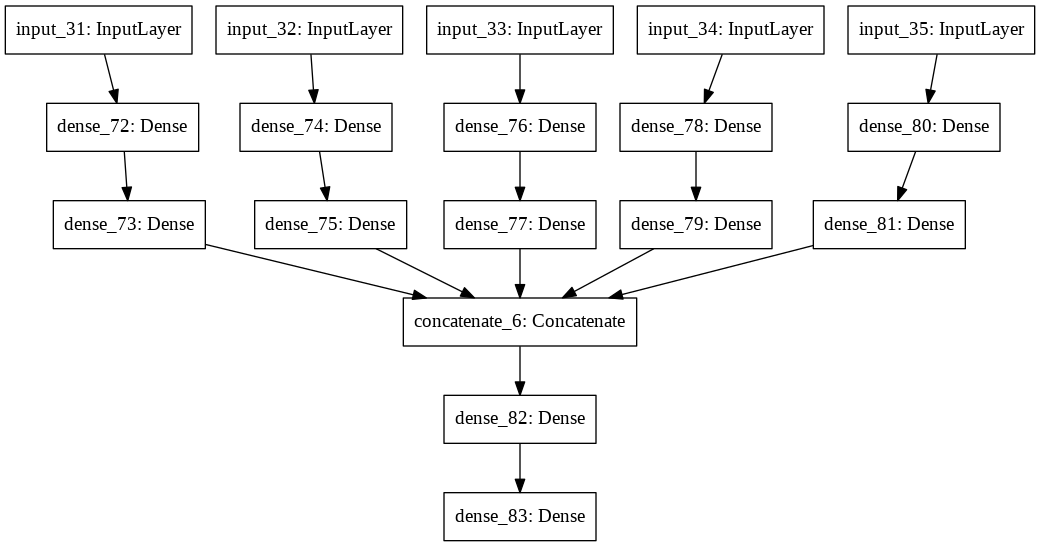

In [0]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_acc',save_best_only=True, verbose=2)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

In [0]:
x1 = tf.convert_to_tensor(Options.values)
x2 = tf.convert_to_tensor(OP_SYS.values)
x3 = tf.convert_to_tensor(Anti_Virus.values)
x4 = tf.convert_to_tensor(Comp_Type.values)
x5 = tf.convert_to_tensor(Location.values)
print(x1)

tf.Tensor(
[[0. 1. 5. ... 6. 0. 7.]
 [0. 1. 5. ... 6. 0. 7.]
 [0. 1. 2. ... 5. 0. 7.]
 ...
 [1. 1. 5. ... 6. 0. 7.]
 [1. 1. 3. ... 6. 0. 7.]
 [1. 1. 2. ... 1. 0. 7.]], shape=(8921483, 7), dtype=float64)


In [0]:
model.fit([x1,x2,x3,x4,x5], y, batch_size=1200, epochs=50,verbose=1, callbacks=[early_stopping, checkpoint])

Train on 8921483 samples
Epoch 1/50
8921483/8921483 [==============================] - 25s 3us/sample - loss: 121.2437 - accuracy: 0.5568
Epoch 2/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 0.6591 - accuracy: 0.5784
Epoch 3/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 0.6609 - accuracy: 0.5769
Epoch 4/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 0.6634 - accuracy: 0.5773
Epoch 5/50
8921483/8921483 [==============================] - 23s 3us/sample - loss: 0.6604 - accuracy: 0.5779
Epoch 6/50
8921483/8921483 [==============================] - 23s 3us/sample - loss: 0.6598 - accuracy: 0.5785
Epoch 7/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 0.6593 - accuracy: 0.5795
Epoch 8/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 0.6546 - accuracy: 0.5842
Epoch 9/50
8921483/8921483 [==============================] - 24s 3us/sample - loss: 

In [0]:
model.evaluate([x1,x2,x3,x4,x5], y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.6467329787349025, 0.6029833]